In [1]:
# import all the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xlrd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import preprocessing  
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import random
from sklearn import tree
import graphviz
%matplotlib inline

In [2]:
# read the datasets in
df = pd.read_excel('Input_set1.xlsx',sheet_name = 'Sheet1')
# df= pd.read_excel('Input_set1.xlsx')
# df2 = pd.read_csv('Data12.csv')

In [3]:
df

,categoryname,categoryname.1,Branch,accountid,siteid,programid,programname,saledate,Sale_Value,Annual_Value,...,materials_invoiced,services_invoiced,Total_Invoiced_By_Program,,Site Name,Site Address,ZIP,Billing Name,Billing Address,Billing ZIP
0,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,NaN,123.6,56314.4,Contact Information >>>,NEW WILSON'S MEATS,"2325 Venango St, Philadelphia PA",19134,,"320 Yorktown Plz, Elkins Park PA",19027
1,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,NaN,123.6,56314.4,Contact Information >>>,NEW WILSON'S MEATS,"2325 Venango St, Philadelphia PA",19134,,"320 Yorktown Plz, Elkins Park PA",19027
2,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,NaN,123.6,56314.4,Contact Information >>>,NEW WILSON'S MEATS,"2325 Venango St, Philadelphia PA",19134,,"320 Yorktown Plz, Elkins Park PA",19027
3,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,NaN,123.6,56314.4,Contact Information >>>,NEW WILSON'S MEATS,"2325 Venango St, Philadelphia PA",19134,,"320 Yorktown Plz, Elkins Park PA",19027
4,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,NaN,123.6,56314.4,Contact Information >>>,NEW WILSON'S MEATS,"2325 Venango St, Philadelphia PA",19134,,"320 Yorktown Plz, Elkins Park PA",19027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41717,82-Midwest Division,389-Kentucky Region,"486-CHARLESTON, WV",34340186,12570321,10978612,Bed Bug & Pest Protection - EOM 6,2020-07-17,576.0,576.0,...,NaN,96.0,96.0,Contact Information >>>,WESLEY HINZMAN,"611 GARRETT ST, SOUTH CHARLESTON WV",25309,WESLEY HINZMAN,"611 GARRETT ST, SOUTH CHARLESTON WV",25309
41718,82-Midwest Division,339-Midwest Commercial Region,"670-CINCINNATI COMM, OH",31680577,10485050,10988772,PC Standard - Odd Job,2020-07-21,80.0,0.0,...,NaN,80.0,80.0,Contact Information >>>,UC/VONTZ CENTER,"3109-3119 EDEN AVE, CINCINNATI OH",45219,,"231 ALBERT SABIN WAY, CINCINNATI OH",45267
41719,85-Northeast Division,499-Beltway Commercial Region,"391-BALTIMORE, MD",25484612,3118392,10995942,PC Special Svcs - Odd Job,2020-07-22,330.0,0.0,...,NaN,330.0,330.0,Contact Information >>>,*CHARTLEYTOWNE- 2020 SPECIALS,"410 CHARTLEY RD, REISTERSTOWN MD",21136,WESTERN OPS,"160 Clubhouse Rd, King Of Prussia PA",19406
41720,85-Northeast Division,379-New York Upstate Region,866-CRAIG THOMAS PEST CONTROL,26639582,4264857,10996502,Bed Bug - Odd Job,2020-07-23,250.0,0.0,...,NaN,250.0,250.0,Contact Information >>>,VASSAR BROTHERS HOSPITAL - BEDBUG,"45 READE Pl, Poughkeepsie NY",12601,,"28 READE PL, POUGHKEEPSIE NY",12601


In [4]:
df.columns

Index(['categoryname', 'categoryname.1', 'Branch', 'accountid', 'siteid',
       'programid', 'programname', 'saledate', 'Sale_Value', 'Annual_Value',
       'Cancel_date', 'Program_Sales_Person', 'Program Type', 'eventid', 'WO#',
       'eventname', 'completeddate', 'completedamount',
       'Chemical_Materials_Applied_Count', 'Product_Materials_Applied_Count',
       'Bait_Materials_Applied_Count', 'Hardware_Materials_Applied_Count',
       'Equipment_Materials_Applied_Count', 'Service_Materials_Applied_Count',
       'Chemical_Materials_Applied', 'Product_Materials_Applied',
       'Bait_Materials_Applied', 'Hardware_Materials_Applied',
       'Equipment_Materials_Applied', 'service_Materials_Applied',
       'Material_Total_price', 'materials_invoiced', 'services_invoiced',
       'Total_Invoiced_By_Program', ' ', 'Site Name', 'Site Address', 'ZIP',
       'Billing Name', 'Billing Address', 'Billing ZIP'],
      dtype='object')

In [5]:
df.shape

(41722, 41)

In [6]:
#check whether the predicted columns have null values
df['Chemical_Materials_Applied'].isna().sum()

7199

In [7]:
df.shape[0]-df['Chemical_Materials_Applied'].isna().sum()

34523

In [8]:
df['Product_Materials_Applied'].isna().sum()

37576

In [9]:
df.shape[0]-df['Product_Materials_Applied'].isna().sum()

4146

In [10]:
df['Hardware_Materials_Applied'].isna().sum()

41722

In [11]:
df.shape[0]-df['Hardware_Materials_Applied'].isna().sum()

0

### Based on the analysis, we can see that hardware columns are all null values


In [12]:
df['Bait_Materials_Applied'].isna().sum()

38446

In [13]:
df.shape[0]-df['Bait_Materials_Applied'].isna().sum()

3276

In [14]:
df['Equipment_Materials_Applied_Count'].isna().sum()

26200

In [15]:
df.shape[0]-df['Equipment_Materials_Applied_Count'].isna().sum()

15522

In [16]:
df['service_Materials_Applied'].isna().sum()

41722

In [17]:
df.shape[0]-df['service_Materials_Applied'].isna().sum()

0

### Based on the analysis, we can see that service columns are all null values


### After preprocessing the data and get familiar with them, we could find out that the columns named Hardware_Materials_Applied as well as the service_Materials_Applied are all null. 

## features: programname, categoryname.1


In [18]:
df.columns
# programname, categoryname.1

Index(['categoryname', 'categoryname.1', 'Branch', 'accountid', 'siteid',
       'programid', 'programname', 'saledate', 'Sale_Value', 'Annual_Value',
       'Cancel_date', 'Program_Sales_Person', 'Program Type', 'eventid', 'WO#',
       'eventname', 'completeddate', 'completedamount',
       'Chemical_Materials_Applied_Count', 'Product_Materials_Applied_Count',
       'Bait_Materials_Applied_Count', 'Hardware_Materials_Applied_Count',
       'Equipment_Materials_Applied_Count', 'Service_Materials_Applied_Count',
       'Chemical_Materials_Applied', 'Product_Materials_Applied',
       'Bait_Materials_Applied', 'Hardware_Materials_Applied',
       'Equipment_Materials_Applied', 'service_Materials_Applied',
       'Material_Total_price', 'materials_invoiced', 'services_invoiced',
       'Total_Invoiced_By_Program', ' ', 'Site Name', 'Site Address', 'ZIP',
       'Billing Name', 'Billing Address', 'Billing ZIP'],
      dtype='object')

In [19]:
df['programname'].unique()

array(['PC Standard - Weekly 4', 'PC Standard - Weekly 5',
       'PC Standard - Monthly', 'Structural Fum',
       'PC Standard - Seasonal', 'PC Standard - Semi-Annual',
       'PC Standard - Semi-Monthly', 'PC Standard - EOM 6',
       'PC Standard - Quarterly 4', 'Pest Elimination - Monthly',
       'Commercial Element - Semi-Monthly', 'PC Standard - EOM 7',
       'Commercial Element - Weekly 5', 'Mosquito - Seasonal',
       'PC Standard - Trimester', 'Carpenter Ant - Annual',
       'Termite Baiting Svc', 'Commercial Gold Medal - Weekly 5',
       'Commercial Element - Monthly', 'Fly Trap Svc - Seasonal',
       'PC Standard - Daily', 'Birdwork - Monthly',
       'Pest Elimination - Weekly 4', 'Drywood Borate Svc',
       'Replace Equip - Monthly', 'Carpenter Ant - Monthly',
       'OE-30 - Monthly', 'Subterranean Termite',
       'Specialty Pest - Seasonal', 'Fly Light Svc - Seasonal',
       'Mosquito - Semi-Monthly', 'Bed Bug - Monthly',
       'Bed Bug Inspection - Odd Job', 

In [20]:
df['categoryname.1']

0        499-Beltway Commercial Region
1        499-Beltway Commercial Region
2        499-Beltway Commercial Region
3        499-Beltway Commercial Region
4        499-Beltway Commercial Region
                     ...              
41717              389-Kentucky Region
41718    339-Midwest Commercial Region
41719    499-Beltway Commercial Region
41720      379-New York Upstate Region
41721    499-Beltway Commercial Region
Name: categoryname.1, Length: 41722, dtype: object

In [21]:
df['Chemical_Materials_Applied'].unique()

array([' FAB', ' BR', nan, ..., ' GOLDM, TEMPFX',
       ' (C)STEFS, TEMPO1%D, TRANSGHP, TRDIAER', ' ARCHER, ONSLFC'],
      dtype=object)

In [22]:

df['Product_Materials_Applied'].unique()

array([nan, ' CPFYT', ' IM', ' TGB', ' CLK, SCM', ' SCM', ' CLK', ' TNC',
       ' Actfoam', ' Actfoam, SCM', ' TRAGL', ' SCM, TRAGL',
       ' CLK, TRAGL', ' IGB (Solid)  ', ' BSMRU', ' BSM', ' IGB (Each)',
       ' PPMA', ' IGB (Solid)  , IM', ' IM, TRAGL', ' H24"', ' GTFLY',
       ' BLIMM', ' BSMRU, IM', ' BSMRU, SCM', ' IM, SCM',
       ' Actfoam, IGB (Solid)  ', ' BEDBG', ' BEDAD', ' PPMA, TRAGL',
       ' Actfoam, IM', ' STGDII', ' BSMRU, IM, SCM',
       ' BLIMM, IGB (Solid)  ', ' IGB (Each), TGB', ' BSM, IGB (Solid)  ',
       ' PSTSTWD', ' CLK, PPMA', ' IM, PPMA', ' BLIMM, IM', ' MCTP',
       ' Actfoam, TRSVC', ' TRSVC', ' IGB (Solid)  , PPMA', ' BSM, BSMRU',
       ' Actfoam, TRAGL', ' IGB (Solid)  , TRAGL', ' PPMA, SCM', ' BEDPR',
       ' EXTLF'], dtype=object)

In [23]:
# plt.hist(x=df['Annual_Value'],bins=5)

In [24]:
# df['Total_Invoiced_By_Program'].unique()

In [25]:
# clean the null value
# df['Total_Invoiced_By_Program'].fillna(value=0)

In [26]:
# df['Total_Invoiced_By_Program'].unique()

In [27]:
# display(df['Total_Invoiced_By_Program'].unique())

In [28]:
# plt.bar(x=df['programid'], height=df['Annual_Value'])

In [29]:
df.columns

Index(['categoryname', 'categoryname.1', 'Branch', 'accountid', 'siteid',
       'programid', 'programname', 'saledate', 'Sale_Value', 'Annual_Value',
       'Cancel_date', 'Program_Sales_Person', 'Program Type', 'eventid', 'WO#',
       'eventname', 'completeddate', 'completedamount',
       'Chemical_Materials_Applied_Count', 'Product_Materials_Applied_Count',
       'Bait_Materials_Applied_Count', 'Hardware_Materials_Applied_Count',
       'Equipment_Materials_Applied_Count', 'Service_Materials_Applied_Count',
       'Chemical_Materials_Applied', 'Product_Materials_Applied',
       'Bait_Materials_Applied', 'Hardware_Materials_Applied',
       'Equipment_Materials_Applied', 'service_Materials_Applied',
       'Material_Total_price', 'materials_invoiced', 'services_invoiced',
       'Total_Invoiced_By_Program', ' ', 'Site Name', 'Site Address', 'ZIP',
       'Billing Name', 'Billing Address', 'Billing ZIP'],
      dtype='object')

In [30]:
[df['Chemical_Materials_Applied'].isna()]

[0        False
 1        False
 2        False
 3         True
 4        False
          ...  
 41717    False
 41718    False
 41719    False
 41720    False
 41721    False
 Name: Chemical_Materials_Applied, Length: 41722, dtype: bool]

In [31]:

# x= df[(df['Chemical_Materials_Applied'].isna()==False)&(df['Product_Materials_Applied'].isna()==False)&
#     (df['Bait_Materials_Applied'].isna()==False)&(df['Hardware_Materials_Applied_Count'].isna()==False) ]

In [32]:
# x2= df[(df['Chemical_Materials_Applied'].isna()==False)&(df['Product_Materials_Applied'].isna()==False)&
#     (df['Bait_Materials_Applied'].isna()==False)&(df['Hardware_Materials_Applied_Count'].isna()==False)
#       &(df['Equipment_Materials_Applied'].isna()==False) ]

In [33]:
# x.shape

In [34]:
# x['Chemical_Materials_Applied']

In [35]:
# x['Product_Materials_Applied']

In [36]:
# x['Bait_Materials_Applied']

In [37]:
df['Hardware_Materials_Applied_Count'].isna().sum()

41722

In [38]:
df.index

RangeIndex(start=0, stop=41722, step=1)

In [39]:
# get a random sample of the original datasets
data= df.copy()

In [40]:
# the random sample is only half of the original one
data.shape

(41722, 41)

In [41]:
# only keep the columns with data
data = data.iloc[:,0:44]

In [42]:
data

,categoryname,categoryname.1,Branch,accountid,siteid,programid,programname,saledate,Sale_Value,Annual_Value,...,materials_invoiced,services_invoiced,Total_Invoiced_By_Program,,Site Name,Site Address,ZIP,Billing Name,Billing Address,Billing ZIP
0,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,NaN,123.6,56314.4,Contact Information >>>,NEW WILSON'S MEATS,"2325 Venango St, Philadelphia PA",19134,,"320 Yorktown Plz, Elkins Park PA",19027
1,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,NaN,123.6,56314.4,Contact Information >>>,NEW WILSON'S MEATS,"2325 Venango St, Philadelphia PA",19134,,"320 Yorktown Plz, Elkins Park PA",19027
2,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,NaN,123.6,56314.4,Contact Information >>>,NEW WILSON'S MEATS,"2325 Venango St, Philadelphia PA",19134,,"320 Yorktown Plz, Elkins Park PA",19027
3,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,NaN,123.6,56314.4,Contact Information >>>,NEW WILSON'S MEATS,"2325 Venango St, Philadelphia PA",19134,,"320 Yorktown Plz, Elkins Park PA",19027
4,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,NaN,123.6,56314.4,Contact Information >>>,NEW WILSON'S MEATS,"2325 Venango St, Philadelphia PA",19134,,"320 Yorktown Plz, Elkins Park PA",19027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41717,82-Midwest Division,389-Kentucky Region,"486-CHARLESTON, WV",34340186,12570321,10978612,Bed Bug & Pest Protection - EOM 6,2020-07-17,576.0,576.0,...,NaN,96.0,96.0,Contact Information >>>,WESLEY HINZMAN,"611 GARRETT ST, SOUTH CHARLESTON WV",25309,WESLEY HINZMAN,"611 GARRETT ST, SOUTH CHARLESTON WV",25309
41718,82-Midwest Division,339-Midwest Commercial Region,"670-CINCINNATI COMM, OH",31680577,10485050,10988772,PC Standard - Odd Job,2020-07-21,80.0,0.0,...,NaN,80.0,80.0,Contact Information >>>,UC/VONTZ CENTER,"3109-3119 EDEN AVE, CINCINNATI OH",45219,,"231 ALBERT SABIN WAY, CINCINNATI OH",45267
41719,85-Northeast Division,499-Beltway Commercial Region,"391-BALTIMORE, MD",25484612,3118392,10995942,PC Special Svcs - Odd Job,2020-07-22,330.0,0.0,...,NaN,330.0,330.0,Contact Information >>>,*CHARTLEYTOWNE- 2020 SPECIALS,"410 CHARTLEY RD, REISTERSTOWN MD",21136,WESTERN OPS,"160 Clubhouse Rd, King Of Prussia PA",19406
41720,85-Northeast Division,379-New York Upstate Region,866-CRAIG THOMAS PEST CONTROL,26639582,4264857,10996502,Bed Bug - Odd Job,2020-07-23,250.0,0.0,...,NaN,250.0,250.0,Contact Information >>>,VASSAR BROTHERS HOSPITAL - BEDBUG,"45 READE Pl, Poughkeepsie NY",12601,,"28 READE PL, POUGHKEEPSIE NY",12601


In [43]:
# find the correlation within the datasets
# data.corr()

In [44]:
# transform the categorical columns into something we could use in the algorithmns
le=preprocessing.LabelEncoder()
data['region']=le.fit_transform(list(data['categoryname.1']))
len(data['region'].unique())

33

In [45]:
le2=preprocessing.LabelEncoder()
data['program']=le2.fit_transform(list(data['programname']))
data['program']

0        44
1        44
2        44
3        44
4        44
         ..
41717     0
41718    37
41719    31
41720     3
41721    31
Name: program, Length: 41722, dtype: int32

In [46]:
le3=preprocessing.LabelEncoder()
data['chemical']=le3.fit_transform(list(data['Chemical_Materials_Applied']))
data['chemical']

0        3101
1        2230
2        2230
3        4183
4        1432
         ... 
41717    4172
41718    3975
41719    4025
41720     906
41721    4152
Name: chemical, Length: 41722, dtype: int32

In [47]:
le4 =preprocessing.LabelEncoder()
data['bait']=le4.fit_transform(list(data['Bait_Materials_Applied']))
data['bait']


0        58
1        58
2        58
3        58
4        58
         ..
41717    58
41718    58
41719    58
41720    58
41721    58
Name: bait, Length: 41722, dtype: int32

In [48]:
le5 =preprocessing.LabelEncoder()
data['hardware']=le5.fit_transform(list(data['Hardware_Materials_Applied']))
data['hardware']
le6 =preprocessing.LabelEncoder()
data['equipment']=le6.fit_transform(list(data['Equipment_Materials_Applied']))
data['equipment']

0        332
1        332
2        332
3        287
4        128
        ... 
41717    332
41718    332
41719    332
41720    332
41721    332
Name: equipment, Length: 41722, dtype: int32

In [49]:
# concat the data into one before clustering
d= pd.concat([data['region'],data['program']],axis=1)

In [50]:

d

,region,program
0,15,44
1,15,44
2,15,44
3,15,44
4,15,44
...,...,...
41717,10,0
41718,6,37
41719,15,31
41720,9,3


In [51]:
# data['programname']

In [52]:
len(d['program'].unique())

62

In [53]:
d['program'].value_counts()/d.shape[0]*100

36    41.517665
44    14.575044
42    13.235224
45    13.048272
33     2.797085
        ...    
50     0.007190
51     0.004794
16     0.002397
22     0.002397
25     0.002397
Name: program, Length: 62, dtype: float64

In [54]:
len(d['region'].unique())

33

In [55]:
d['region'].value_counts()/d.shape[0]*100

15    13.235224
22    10.610709
6      8.237860
32     7.967020
21     7.523609
23     6.358756
18     4.609079
14     3.786971
9      3.739035
29     2.943291
12     2.789895
0      2.710800
24     2.432769
28     2.315325
20     2.200278
27     2.140358
30     2.063659
10     1.852740
8      1.838359
2      1.675375
31     1.339821
4      1.258329
26     1.174440
13     1.162456
1      0.812521
7      0.747807
19     0.704664
17     0.529697
25     0.491347
3      0.266047
11     0.210920
5      0.174968
16     0.095873
Name: region, dtype: float64

In [56]:
data['Equipment_Materials_Applied'].unique()

array([nan, ' ORC', ' GBMOU', ' GBMOU, SNTRM', ' TCGB', ' GBMOU, GBTR',
       ' SNTRM, TCGB', ' FLYK, GBMOU', ' RTRP', ' GBLR', ' GBMOU, RTRP',
       ' ORC, TCGB', ' FLYK, TCGB', ' GBMOU, TCGB', ' GBMOU, ORC',
       ' GBMOU, MTRA', ' GLUBD (Solid)', ' GBMOU, TICT', ' EGLB',
       ' MTRA, TCGB', ' FBS, GLUBD (Solid)', ' HTCG3',
       ' EGLB, EXCL, TCGB', ' EXCL, TCGB', ' REPCD, TCGB', ' MTRA, TICT',
       ' TICT', ' TCAT', ' MTRA, TINCATCS', ' MTRA', ' FBS', ' AlpineTr',
       ' GB180', ' AlpineTr, GB180', ' AlpineTr, GBMOU', ' AlpineTr, FBS',
       ' GLUBD (Solid), MTRA', ' FLGB, GBMOU', ' GBMOU, GT150GB',
       ' GB180, GBMOU', ' GLREP', ' FYET', ' FLYK',
       ' AlpineTr, GBMOU, MTRA', ' GBMOU, REPCD', ' REPCD', ' GLEB, RTRP',
       ' GT180GB', ' GFYSS, HTCG3, ORC', ' BAITE', ' GBTR', ' GBTR, TREX',
       ' GBTR, TCGB', ' AlpineTr, TCGB', ' GLREP, TCGB',
       ' GBMOU, MCTR, MTRA', ' GT150GB, TCGB', ' GT150GB, HTCG3',
       ' GT150GB', ' FSFL', ' IMM', ' GLEM', ' GLEB',

In [57]:
len(data['equipment'].unique())

333

### This part predicts the bait products based on region and program

In [58]:
bait_no_null= data.dropna(subset=['Bait_Materials_Applied'])
bait_no_null

,categoryname,categoryname.1,Branch,accountid,siteid,programid,programname,saledate,Sale_Value,Annual_Value,...,ZIP,Billing Name,Billing Address,Billing ZIP,region,program,chemical,bait,hardware,equipment
57,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,19134,,"320 Yorktown Plz, Elkins Park PA",19027,15,44,3102,34,27864,128
74,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,19134,,"320 Yorktown Plz, Elkins Park PA",19027,15,44,3440,34,27840,128
84,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,19134,,"320 Yorktown Plz, Elkins Park PA",19027,15,44,1694,34,27728,320
115,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,19134,,"320 Yorktown Plz, Elkins Park PA",19027,15,44,426,34,27719,128
121,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,19134,,"320 Yorktown Plz, Elkins Park PA",19027,15,44,3681,34,27745,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41596,84-South Central Division,899-South Central Commercial Region,"677-ST. LOUIS COMM, MO",29305860,7015365,10801591,Wildlife - Odd Job,2020-05-28,350.0,0.0,...,63146,HOLLY HOLTZMANN,"1945 CRAIG Rd, Saint Louis MO",63146,32,61,4183,55,13948,332
41626,84-South Central Division,849-N. Texas/Oklahoma Region,"826-DALLAS, TX",29970683,10987935,10826130,Carpenter Ant - Odd Job,2020-06-03,240.0,0.0,...,75056,,"P O BOX 209212 , AUSTIN TX",78720,29,10,2750,23,13978,332
41650,85-Northeast Division,449-Virginia Region,660-CENTRAL VIRGINIA COMM,1081309,1085784,10861314,Bed Bug - Odd Job,2020-06-14,291.0,0.0,...,23060,,"2000 WARE BOTTOM SPRING RD, CHESTER VA",23836,14,3,4183,35,13881,332
41694,84-South Central Division,409-Tennesee/Alabama Region,"106-BIRMINGHAM, AL",29594548,10166799,10932167,Termite Baiting Svc,2020-07-02,1299.0,299.0,...,35210,LEE LODER,"PO BOX 13545 , Birmingham AL",35202,12,59,4183,51,13924,332


In [59]:
bait_no_null['bait']

57       34
74       34
84       34
115      34
121      34
         ..
41596    55
41626    23
41650    35
41694    51
41709    34
Name: bait, Length: 3276, dtype: int32

In [60]:
bait_no_null['bait'].index

Int64Index([   57,    74,    84,   115,   121,   125,   147,   149,   150,
              151,
            ...
            41421, 41432, 41489, 41512, 41591, 41596, 41626, 41650, 41694,
            41709],
           dtype='int64', length=3276)

In [61]:
d.iloc[bait_no_null['bait'].index]

,region,program
57,15,44
74,15,44
84,15,44
115,15,44
121,15,44
...,...,...
41596,32,61
41626,29,10
41650,14,3
41694,12,59


In [62]:
# split the data for traning and testing
x1_train,x1_test,y1_train,y1_test = train_test_split(d.iloc[bait_no_null['bait'].index],bait_no_null['bait'],test_size=0.2)

In [63]:
x1_train

,region,program
38107,6,36
11088,15,44
9556,14,36
10659,15,36
38775,25,36
...,...,...
12390,10,19
6282,1,44
14836,15,45
28837,27,36


In [64]:
knn=KNeighborsClassifier(n_neighbors=3)

In [65]:
knn.fit(x1_train,y1_train)

KNeighborsClassifier(n_neighbors=3)

In [66]:
# knn.predict()

In [67]:
knn.score(x1_train,y1_train)

0.44618320610687023

In [68]:
knn.score(x1_test,y1_test)


0.4070121951219512

In [69]:
bait_no_null['bait_predict']= knn.predict(d.iloc[bait_no_null['bait'].index])

<ipython-input-69-a4c684dc07c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bait_no_null['bait_predict']= knn.predict(d.iloc[bait_no_null['bait'].index])


In [70]:
bait_no_null

,categoryname,categoryname.1,Branch,accountid,siteid,programid,programname,saledate,Sale_Value,Annual_Value,...,Billing Name,Billing Address,Billing ZIP,region,program,chemical,bait,hardware,equipment,bait_predict
57,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,,"320 Yorktown Plz, Elkins Park PA",19027,15,44,3102,34,27864,128,14
74,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,,"320 Yorktown Plz, Elkins Park PA",19027,15,44,3440,34,27840,128,14
84,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,,"320 Yorktown Plz, Elkins Park PA",19027,15,44,1694,34,27728,320,14
115,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,,"320 Yorktown Plz, Elkins Park PA",19027,15,44,426,34,27719,128,14
121,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,,"320 Yorktown Plz, Elkins Park PA",19027,15,44,3681,34,27745,128,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41596,84-South Central Division,899-South Central Commercial Region,"677-ST. LOUIS COMM, MO",29305860,7015365,10801591,Wildlife - Odd Job,2020-05-28,350.0,0.0,...,HOLLY HOLTZMANN,"1945 CRAIG Rd, Saint Louis MO",63146,32,61,4183,55,13948,332,51
41626,84-South Central Division,849-N. Texas/Oklahoma Region,"826-DALLAS, TX",29970683,10987935,10826130,Carpenter Ant - Odd Job,2020-06-03,240.0,0.0,...,,"P O BOX 209212 , AUSTIN TX",78720,29,10,2750,23,13978,332,31
41650,85-Northeast Division,449-Virginia Region,660-CENTRAL VIRGINIA COMM,1081309,1085784,10861314,Bed Bug - Odd Job,2020-06-14,291.0,0.0,...,,"2000 WARE BOTTOM SPRING RD, CHESTER VA",23836,14,3,4183,35,13881,332,6
41694,84-South Central Division,409-Tennesee/Alabama Region,"106-BIRMINGHAM, AL",29594548,10166799,10932167,Termite Baiting Svc,2020-07-02,1299.0,299.0,...,LEE LODER,"PO BOX 13545 , Birmingham AL",35202,12,59,4183,51,13924,332,51


In [71]:
bait_no_null['bait_result']= le4.inverse_transform(bait_no_null['bait_predict'])

<ipython-input-71-3bc7d818ed7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bait_no_null['bait_result']= le4.inverse_transform(bait_no_null['bait_predict'])


In [72]:
bait_no_null

,categoryname,categoryname.1,Branch,accountid,siteid,programid,programname,saledate,Sale_Value,Annual_Value,...,Billing Address,Billing ZIP,region,program,chemical,bait,hardware,equipment,bait_predict,bait_result
57,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,"320 Yorktown Plz, Elkins Park PA",19027,15,44,3102,34,27864,128,14,ADVIONR
74,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,"320 Yorktown Plz, Elkins Park PA",19027,15,44,3440,34,27840,128,14,ADVIONR
84,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,"320 Yorktown Plz, Elkins Park PA",19027,15,44,1694,34,27728,320,14,ADVIONR
115,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,"320 Yorktown Plz, Elkins Park PA",19027,15,44,426,34,27719,128,14,ADVIONR
121,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,"320 Yorktown Plz, Elkins Park PA",19027,15,44,3681,34,27745,128,14,ADVIONR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41596,84-South Central Division,899-South Central Commercial Region,"677-ST. LOUIS COMM, MO",29305860,7015365,10801591,Wildlife - Odd Job,2020-05-28,350.0,0.0,...,"1945 CRAIG Rd, Saint Louis MO",63146,32,61,4183,55,13948,332,51,REHD2
41626,84-South Central Division,849-N. Texas/Oklahoma Region,"826-DALLAS, TX",29970683,10987935,10826130,Carpenter Ant - Odd Job,2020-06-03,240.0,0.0,...,"P O BOX 209212 , AUSTIN TX",78720,29,10,2750,23,13978,332,31,HADVC (Ounce)
41650,85-Northeast Division,449-Virginia Region,660-CENTRAL VIRGINIA COMM,1081309,1085784,10861314,Bed Bug - Odd Job,2020-06-14,291.0,0.0,...,"2000 WARE BOTTOM SPRING RD, CHESTER VA",23836,14,3,4183,35,13881,332,6,ADVIONANT
41694,84-South Central Division,409-Tennesee/Alabama Region,"106-BIRMINGHAM, AL",29594548,10166799,10932167,Termite Baiting Svc,2020-07-02,1299.0,299.0,...,"PO BOX 13545 , Birmingham AL",35202,12,59,4183,51,13924,332,51,REHD2


In [73]:
Bait_ = bait_no_null[['categoryname.1','programname','bait_result']]

In [74]:
Bait_

,categoryname.1,programname,bait_result
57,499-Beltway Commercial Region,PC Standard - Weekly 4,ADVIONR
74,499-Beltway Commercial Region,PC Standard - Weekly 4,ADVIONR
84,499-Beltway Commercial Region,PC Standard - Weekly 4,ADVIONR
115,499-Beltway Commercial Region,PC Standard - Weekly 4,ADVIONR
121,499-Beltway Commercial Region,PC Standard - Weekly 4,ADVIONR
...,...,...,...
41596,899-South Central Commercial Region,Wildlife - Odd Job,REHD2
41626,849-N. Texas/Oklahoma Region,Carpenter Ant - Odd Job,HADVC (Ounce)
41650,449-Virginia Region,Bed Bug - Odd Job,ADVIONANT
41694,409-Tennesee/Alabama Region,Termite Baiting Svc,REHD2


In [75]:
# Use the random foresr to predict the results
clf= RandomForestClassifier(n_estimators=10)

In [76]:
clf.fit(x1_train,y1_train)

RandomForestClassifier(n_estimators=10)

In [77]:
clf.score(x1_train,y1_train)

0.5923664122137404

In [78]:
clf.score(x1_test,y1_test)

0.5320121951219512

In [79]:
bait_no_null.columns

Index(['categoryname', 'categoryname.1', 'Branch', 'accountid', 'siteid',
       'programid', 'programname', 'saledate', 'Sale_Value', 'Annual_Value',
       'Cancel_date', 'Program_Sales_Person', 'Program Type', 'eventid', 'WO#',
       'eventname', 'completeddate', 'completedamount',
       'Chemical_Materials_Applied_Count', 'Product_Materials_Applied_Count',
       'Bait_Materials_Applied_Count', 'Hardware_Materials_Applied_Count',
       'Equipment_Materials_Applied_Count', 'Service_Materials_Applied_Count',
       'Chemical_Materials_Applied', 'Product_Materials_Applied',
       'Bait_Materials_Applied', 'Hardware_Materials_Applied',
       'Equipment_Materials_Applied', 'service_Materials_Applied',
       'Material_Total_price', 'materials_invoiced', 'services_invoiced',
       'Total_Invoiced_By_Program', ' ', 'Site Name', 'Site Address', 'ZIP',
       'Billing Name', 'Billing Address', 'Billing ZIP', 'region', 'program',
       'chemical', 'bait', 'hardware', 'equipment', 'bai

In [80]:
# split the data for traning and testing
x4_train,x4_test,y4_train,y4_test = train_test_split(d.iloc[bait_no_null['bait'].index],bait_no_null['Bait_Materials_Applied'],test_size=0.2)

In [81]:
x4_train

,region,program
1493,15,44
33353,20,45
13240,10,36
13614,28,36
40444,20,0
...,...,...
1714,5,36
3314,14,45
4215,14,17
15768,22,42


In [82]:
y4_train

1493                INTICE10
33353              ADVIONANT
13240               INTICE10
13614               INTICE10
40444                 OPTCGB
                ...         
1714                RESOLV40
3314                 ADVIONR
4215      ADVIONANT, ADVIONR
15768               MAXFCBST
761                  ADVIONR
Name: Bait_Materials_Applied, Length: 2620, dtype: object

In [83]:
# use the random forest to predict results with y untransfromed
clf2=RandomForestClassifier(n_estimators=10)

In [84]:
clf2.fit(x4_train,y4_train)

RandomForestClassifier(n_estimators=10)

In [85]:
clf2.score(x4_train,y4_train)

0.5900763358778626

In [86]:
clf2.score(x4_test,y4_test)

0.5548780487804879

In [87]:
clf2.n_estimators

10

In [88]:
clf2.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1098222708),
 DecisionTreeClassifier(max_features='auto', random_state=411715371),
 DecisionTreeClassifier(max_features='auto', random_state=1008368185),
 DecisionTreeClassifier(max_features='auto', random_state=1168898127),
 DecisionTreeClassifier(max_features='auto', random_state=314507164),
 DecisionTreeClassifier(max_features='auto', random_state=1702269145),
 DecisionTreeClassifier(max_features='auto', random_state=2065465841),
 DecisionTreeClassifier(max_features='auto', random_state=853438301),
 DecisionTreeClassifier(max_features='auto', random_state=349120411),
 DecisionTreeClassifier(max_features='auto', random_state=1009515352)]

In [89]:
# from sklearn import tree
# data = tree.export_graphviz(clf2.estimators_[1], out_file= None)
# graphviz.Source(data)


### This part predicts the hardware products based on industry and region

In [90]:
# split the data for traning and testing
x2_train,x2_test,y2_train,y2_test = train_test_split(d.iloc[:,0:2],data['hardware'],test_size=0.2)

In [91]:
len(data['hardware'].unique())

41722

In [92]:
len(data['Hardware_Materials_Applied'].unique())

1

In [93]:
data['Hardware_Materials_Applied'].isna().sum()

41722

In [94]:
data.shape

(41722, 47)

In [95]:
data['programname'].unique()

array(['PC Standard - Weekly 4', 'PC Standard - Weekly 5',
       'PC Standard - Monthly', 'Structural Fum',
       'PC Standard - Seasonal', 'PC Standard - Semi-Annual',
       'PC Standard - Semi-Monthly', 'PC Standard - EOM 6',
       'PC Standard - Quarterly 4', 'Pest Elimination - Monthly',
       'Commercial Element - Semi-Monthly', 'PC Standard - EOM 7',
       'Commercial Element - Weekly 5', 'Mosquito - Seasonal',
       'PC Standard - Trimester', 'Carpenter Ant - Annual',
       'Termite Baiting Svc', 'Commercial Gold Medal - Weekly 5',
       'Commercial Element - Monthly', 'Fly Trap Svc - Seasonal',
       'PC Standard - Daily', 'Birdwork - Monthly',
       'Pest Elimination - Weekly 4', 'Drywood Borate Svc',
       'Replace Equip - Monthly', 'Carpenter Ant - Monthly',
       'OE-30 - Monthly', 'Subterranean Termite',
       'Specialty Pest - Seasonal', 'Fly Light Svc - Seasonal',
       'Mosquito - Semi-Monthly', 'Bed Bug - Monthly',
       'Bed Bug Inspection - Odd Job', 

In [96]:
knn=KNeighborsClassifier(n_neighbors=5)

In [97]:
knn.fit(x2_train,y2_train)

KNeighborsClassifier()

In [98]:
# g= data.groupby(['program','region'])['Bait_Materials_Applied'].count()

In [99]:
knn.score(x2_train,y2_train)

0.007669952362405249

In [100]:
knn.score(x2_test,y2_test)

0.0

### From the result, we can see that all of the hardware data we have are null. Therefore, it is meaningless to do a prediction.

### This part predicts the equipment products based on industry and region

In [101]:
# data

In [102]:
equipment_no_null= data.dropna(subset=['Equipment_Materials_Applied'])
equipment_no_null

,categoryname,categoryname.1,Branch,accountid,siteid,programid,programname,saledate,Sale_Value,Annual_Value,...,ZIP,Billing Name,Billing Address,Billing ZIP,region,program,chemical,bait,hardware,equipment
3,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,19134,,"320 Yorktown Plz, Elkins Park PA",19027,15,44,4183,58,27810,287
4,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,19134,,"320 Yorktown Plz, Elkins Park PA",19027,15,44,1432,58,27811,128
7,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,19134,,"320 Yorktown Plz, Elkins Park PA",19027,15,44,3154,58,27814,128
9,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,19134,,"320 Yorktown Plz, Elkins Park PA",19027,15,44,1691,58,27816,128
10,85-Northeast Division,499-Beltway Commercial Region,"691-PENN JERSEY COMMERCIAL, PA",100445,105513,75341,PC Standard - Weekly 4,2009-08-28,6135.0,5932.8,...,19134,,"320 Yorktown Plz, Elkins Park PA",19027,15,44,3101,58,27817,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41685,86-Pacific Division,711-S. California Commercial Region,"687-LOS ANGELES COMMERCIAL, CA",27476079,12480436,10912238,PC Standard - Every 2 Weeks,2020-06-01,6695.0,5720.0,...,90022,ANA RODRIGUEZ,"6701 WILSON AVE, LOS ANGELES CA",90001,22,35,3309,58,13915,184
41700,84-South Central Division,849-N. Texas/Oklahoma Region,"826-DALLAS, TX",30170671,10970329,10944086,PC Standard - Odd Job,2020-07-08,155.0,0.0,...,75056,,"BILLBOX#: 00-(ORKPE)-1004 , AUSTIN TX",78720,29,37,2758,58,13912,287
41703,82-Midwest Division,579-Indiana/Ohio Region,"577-MERRILLVILLE, IN",34237949,12458088,10948230,Commercial Element - Monthly,2020-07-09,2003.0,996.0,...,46410,MELODY KALUBA,"2901 83RD PL, MERRILLVILLE IN",46410,20,14,4140,58,13900,317
41708,86-Pacific Division,749-Pacific Northwest Region,"755-SPOKANE, WA",34169874,12382831,10963531,PC Standard - Monthly,2020-07-01,780.0,780.0,...,99003,GINA LICEA,"28118 NEWPORT HWY, CHATTAROY WA",99003,24,36,2014,58,13897,3


In [103]:
d.iloc[equipment_no_null['bait'].index]

,region,program
3,15,44
4,15,44
7,15,44
9,15,44
10,15,44
...,...,...
41685,22,35
41700,29,37
41703,20,14
41708,24,36


In [104]:
# split the data for traning and testing
x3_train,x3_test,y3_train,y3_test = train_test_split(d.iloc[equipment_no_null['bait'].index], equipment_no_null['equipment'],test_size=0.2)

In [105]:
knn=KNeighborsClassifier(n_neighbors=3)

In [106]:
knn.fit(x3_train,y3_train)

KNeighborsClassifier(n_neighbors=3)

In [107]:
knn.score(x3_train,y3_train)

0.40347910123218167

In [108]:
knn.score(x3_test,y3_test)

0.3855072463768116

In [109]:
equipment_no_null['equipment_predict']= knn.predict(d.iloc[equipment_no_null['bait'].index])

<ipython-input-109-60a34fc690df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  equipment_no_null['equipment_predict']= knn.predict(d.iloc[equipment_no_null['bait'].index])


In [110]:
equipment_no_null['equipment_result']= le6.inverse_transform(equipment_no_null['equipment_predict'])

<ipython-input-110-c33c18c0757a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  equipment_no_null['equipment_result']= le6.inverse_transform(equipment_no_null['equipment_predict'])


In [111]:
equipment_no_null['equipment_result']

3         GT150GB, MTRA
4         GT150GB, MTRA
7         GT150GB, MTRA
9         GT150GB, MTRA
10        GT150GB, MTRA
              ...      
41685             GBMOU
41700               ORC
41703             GBMOU
41708             GBMOU
41716             GBMOU
Name: equipment_result, Length: 15522, dtype: object

In [112]:
Equipment_ = equipment_no_null[['categoryname.1','programname','equipment_result']]

In [113]:
Equipment_

,categoryname.1,programname,equipment_result
3,499-Beltway Commercial Region,PC Standard - Weekly 4,"GT150GB, MTRA"
4,499-Beltway Commercial Region,PC Standard - Weekly 4,"GT150GB, MTRA"
7,499-Beltway Commercial Region,PC Standard - Weekly 4,"GT150GB, MTRA"
9,499-Beltway Commercial Region,PC Standard - Weekly 4,"GT150GB, MTRA"
10,499-Beltway Commercial Region,PC Standard - Weekly 4,"GT150GB, MTRA"
...,...,...,...
41685,711-S. California Commercial Region,PC Standard - Every 2 Weeks,GBMOU
41700,849-N. Texas/Oklahoma Region,PC Standard - Odd Job,ORC
41703,579-Indiana/Ohio Region,Commercial Element - Monthly,GBMOU
41708,749-Pacific Northwest Region,PC Standard - Monthly,GBMOU


### Clustering

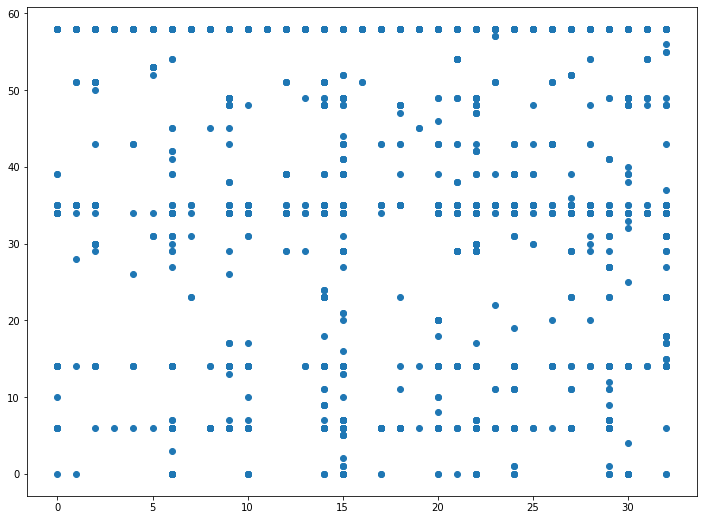

In [114]:
# first graph the scatter plot of region vs bait use
plt.figure(figsize= (12,9))
plt.scatter(data['region'],data['bait'])

In [115]:
# declare the model KMeans
km = KMeans(n_clusters= 10,random_state = 5)

In [116]:
# cluster the data
y= km.fit_predict(d.iloc[:, 0:2])

In [117]:
y

array([3, 3, 3, ..., 1, 2, 1])

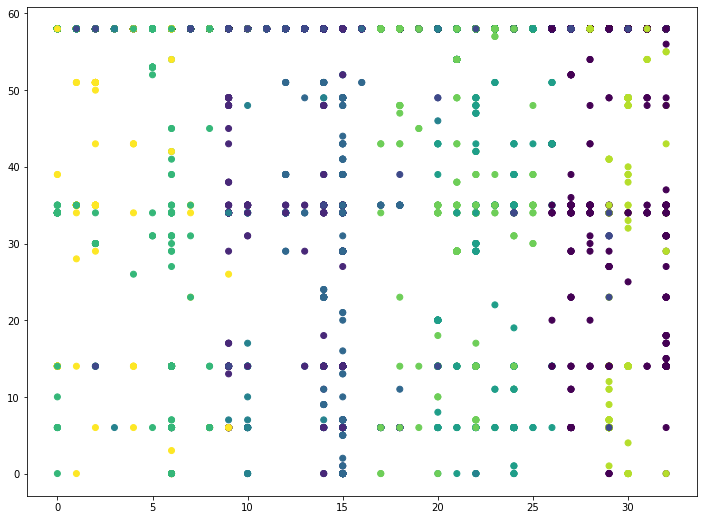

In [118]:
# graph the plot again and look at the cluster
plt.figure(figsize= (12,9))
plt.scatter(data['region'],data['bait'],c=y)

In [119]:
r1= pd.Series(km.labels_)

In [120]:
r1.value_counts()

7    7222
5    6774
3    6040
6    5082
0    4793
1    3910
8    3039
9    2304
2    1447
4    1111
dtype: int64

In [121]:
r1.value_counts().sum()

41722

In [122]:
r1.unique()

array([3, 1, 6, 0, 7, 9, 4, 5, 2, 8])

In [123]:
y

array([3, 3, 3, ..., 1, 2, 1])

In [124]:
center= pd.DataFrame(km.cluster_centers_)

In [125]:
center.isna().sum()

0    0
1    0
dtype: int64

In [126]:
center.shape

(10, 2)

In [127]:
result = pd.concat([center,r1.value_counts()],axis=1 )

In [128]:
# result.columns= ['region','program','bait','counts']

In [129]:
result

,0,1,0
0,29.604840,35.823075,4793
1,12.524808,35.430179,3910
2,17.832757,3.442294,1447
3,14.638516,43.950157,6040
4,10.282628,17.225023,1111
5,22.273103,43.744464,6774
6,4.436442,35.499016,5082
7,20.991969,35.864996,7222
8,30.735439,43.598223,3039
9,5.344469,44.795228,2304


In [130]:
data['region']

0        15
1        15
2        15
3        15
4        15
         ..
41717    10
41718     6
41719    15
41720     9
41721    15
Name: region, Length: 41722, dtype: int32

In [131]:
data[data['region'] ==20]

,categoryname,categoryname.1,Branch,accountid,siteid,programid,programname,saledate,Sale_Value,Annual_Value,...,ZIP,Billing Name,Billing Address,Billing ZIP,region,program,chemical,bait,hardware,equipment
14454,82-Midwest Division,579-Indiana/Ohio Region,"576-ZIONSVILLE, IN",26767554,4323263,4166163,PC Standard - Semi-Monthly,2012-01-09,2932.5,3438.0,...,46228,,"5260 MICHIGAN Rd, Indianapolis IN",46228,20,42,865,58,39458,128
14455,82-Midwest Division,579-Indiana/Ohio Region,"576-ZIONSVILLE, IN",26767554,4323263,4166163,PC Standard - Semi-Monthly,2012-01-09,2932.5,3438.0,...,46228,,"5260 MICHIGAN Rd, Indianapolis IN",46228,20,42,865,58,39451,128
14456,82-Midwest Division,579-Indiana/Ohio Region,"576-ZIONSVILLE, IN",26767554,4323263,4166163,PC Standard - Semi-Monthly,2012-01-09,2932.5,3438.0,...,46228,,"5260 MICHIGAN Rd, Indianapolis IN",46228,20,42,1697,58,39452,128
14457,82-Midwest Division,579-Indiana/Ohio Region,"576-ZIONSVILLE, IN",26767554,4323263,4166163,PC Standard - Semi-Monthly,2012-01-09,2932.5,3438.0,...,46228,,"5260 MICHIGAN Rd, Indianapolis IN",46228,20,42,1697,58,39453,128
14458,82-Midwest Division,579-Indiana/Ohio Region,"576-ZIONSVILLE, IN",26767554,4323263,4166163,PC Standard - Semi-Monthly,2012-01-09,2932.5,3438.0,...,46228,,"5260 MICHIGAN Rd, Indianapolis IN",46228,20,42,1711,58,39454,332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41686,82-Midwest Division,579-Indiana/Ohio Region,"571-FT. WAYNE, IN",32262948,12484262,10914830,Commercial Element - Odd Job,2020-06-30,300.0,0.0,...,46804,,"5775 COVENTRY LN, FORT WAYNE IN",46804,20,15,4096,58,13916,332
41692,82-Midwest Division,579-Indiana/Ohio Region,"576-ZIONSVILLE, IN",26767555,12496204,10924606,Bed Bug - Odd Job,2020-07-01,575.0,0.0,...,46228,,"5260 MICHIGAN Rd, Indianapolis IN",46228,20,3,1851,58,13922,332
41693,82-Midwest Division,579-Indiana/Ohio Region,"576-ZIONSVILLE, IN",26767555,12496204,10924606,Bed Bug - Odd Job,2020-07-01,575.0,0.0,...,46228,,"5260 MICHIGAN Rd, Indianapolis IN",46228,20,3,925,58,13923,332
41703,82-Midwest Division,579-Indiana/Ohio Region,"577-MERRILLVILLE, IN",34237949,12458088,10948230,Commercial Element - Monthly,2020-07-09,2003.0,996.0,...,46410,MELODY KALUBA,"2901 83RD PL, MERRILLVILLE IN",46410,20,14,4140,58,13900,317


In [132]:
data[data['region'] ==17]

,categoryname,categoryname.1,Branch,accountid,siteid,programid,programname,saledate,Sale_Value,Annual_Value,...,ZIP,Billing Name,Billing Address,Billing ZIP,region,program,chemical,bait,hardware,equipment
19920,82-Midwest Division,519-Illinois Region,"520-ALSIP, IL",28156498,5571288,5365366,PC Standard - Monthly,1989-10-27,1181.79,0.0,...,60438,,"PO BOX 703 , Lansing IL",60438,17,36,44,58,33995,213
19921,82-Midwest Division,519-Illinois Region,"520-ALSIP, IL",28156498,5571288,5365366,PC Standard - Monthly,1989-10-27,1181.79,0.0,...,60438,,"PO BOX 703 , Lansing IL",60438,17,36,42,58,33996,213
19922,82-Midwest Division,519-Illinois Region,"520-ALSIP, IL",28156498,5571288,5365366,PC Standard - Monthly,1989-10-27,1181.79,0.0,...,60438,,"PO BOX 703 , Lansing IL",60438,17,36,42,58,34018,213
19923,82-Midwest Division,519-Illinois Region,"520-ALSIP, IL",28156498,5571288,5365366,PC Standard - Monthly,1989-10-27,1181.79,0.0,...,60438,,"PO BOX 703 , Lansing IL",60438,17,36,3908,58,34020,213
19924,82-Midwest Division,519-Illinois Region,"520-ALSIP, IL",28156498,5571288,5365366,PC Standard - Monthly,1989-10-27,1181.79,0.0,...,60438,,"PO BOX 703 , Lansing IL",60438,17,36,90,58,34059,213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37951,82-Midwest Division,519-Illinois Region,"518-OAK PARK, IL",32572630,10580233,9457741,PC Standard - Monthly,2018-09-12,1000.00,900.0,...,60623,GREGORZ BABINSKI,"381 ELMWOOD AVE, WOOD DALE IL",60191,17,36,3391,58,10832,332
37952,82-Midwest Division,519-Illinois Region,"518-OAK PARK, IL",32572630,10580233,9457741,PC Standard - Monthly,2018-09-12,1000.00,900.0,...,60623,GREGORZ BABINSKI,"381 ELMWOOD AVE, WOOD DALE IL",60191,17,36,3391,0,10815,270
37953,82-Midwest Division,519-Illinois Region,"518-OAK PARK, IL",32572630,10580233,9457741,PC Standard - Monthly,2018-09-12,1000.00,900.0,...,60623,GREGORZ BABINSKI,"381 ELMWOOD AVE, WOOD DALE IL",60191,17,36,4025,58,10814,332
37954,82-Midwest Division,519-Illinois Region,"518-OAK PARK, IL",32572630,10580233,9457741,PC Standard - Monthly,2018-09-12,1000.00,900.0,...,60623,GREGORZ BABINSKI,"381 ELMWOOD AVE, WOOD DALE IL",60191,17,36,1578,0,10813,332


In [133]:
len(data['chemical'].unique())

4184

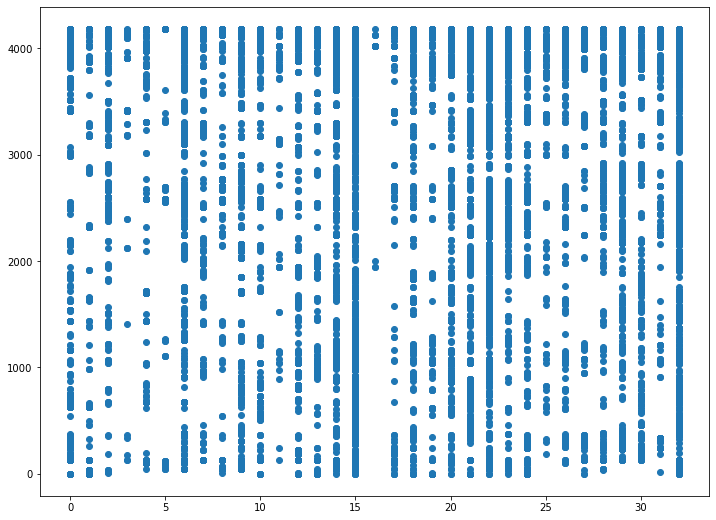

In [134]:
plt.figure(figsize= (12,9))
plt.scatter(data['region'],data['chemical'])

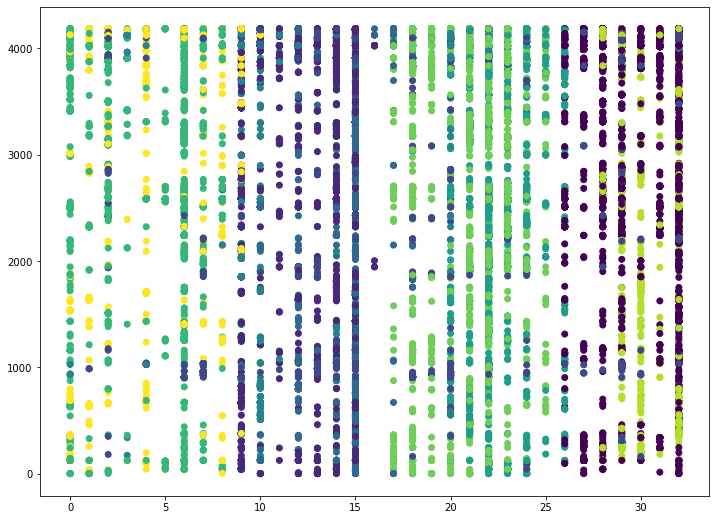

In [135]:
# graph the plot again and look at the cluster
plt.figure(figsize= (12,9))
plt.scatter(data['region'],data['chemical'],c=y)

In [136]:

data['product']=le.fit_transform(list(data['Product_Materials_Applied']))
data['product']

0        49
1        49
2        49
3        49
4        49
         ..
41717    49
41718    49
41719    49
41720    49
41721    49
Name: product, Length: 41722, dtype: int32

In [137]:
data['Product_Materials_Applied']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
41717    NaN
41718    NaN
41719    NaN
41720    NaN
41721    NaN
Name: Product_Materials_Applied, Length: 41722, dtype: object

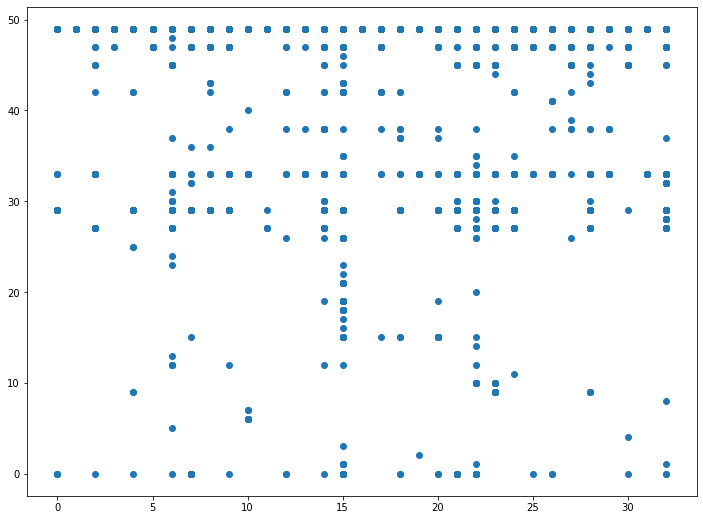

In [138]:
plt.figure(figsize= (12,9))
plt.scatter(data['region'],data['product'])

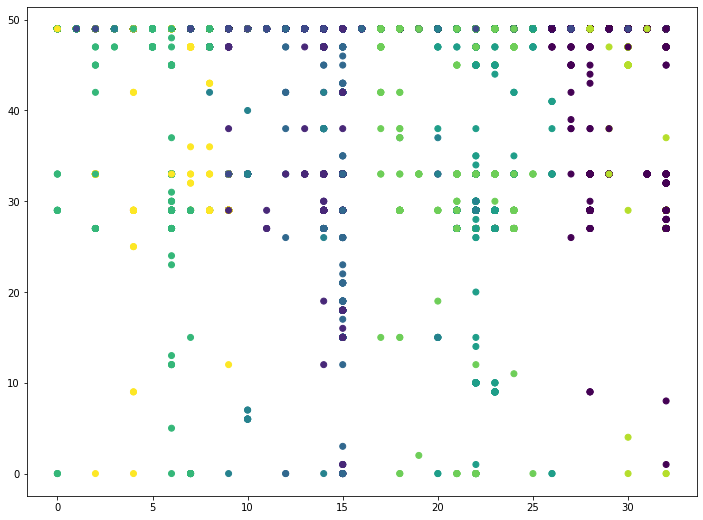

In [139]:
plt.figure(figsize= (12,9))
plt.scatter(data['region'],data['product'],c=y)